1.	Write a python program (not a Jupyter notebook, but a py file you run from the command line) that accepts the cats_txt.txt file as input and counts the frequency of all words and punctuation in that text file, ordered by frequency. Make sure to handle capital and lowercase versions of words and count them together.

#### The below code was used in VSC and passed to the command line. 

##### The following was passed to the command line:  cat ../cats.txt|./mapper.py|sort|./frequency.py

## Mapper.py

In [ ]:
#!/usr/bin/env python

#the above is called a 'shebag line': tells our interpreter where to access python
# mapper- breaking up words into units

import sys #sys is for system variables

#The following is the command line program: from terminal, we want to 
# be able to run this program and pass stuff into it 
# (like a file or a sentence)

#In order to do the above we need to do: stdin = standard input--
# this stdin is what the code is using to read whatever is passed in to it


for line in sys.stdin:

    #strip/remove white spaces at begining and end of line
    line = line.strip()
    line = line.lower()

    #split each line up
    words = line.split()

    #process each word and assign a value of 1 to each word
    for word in words:
        print(word + "\t1") #\t1 is used so we can see what is happening

# This is the mapping or basic tokenization code

## Frequency.py

In [ ]:
#!/usr/bin/env python

#the above is called a 'shebag line': tells our interpreter where to access python
# mapper- breaking up words into units
  
# ordered by frequency (use sort?)

#sys is for system variables
import sys

# artifical pointer which will increment as we move through
current_word = None

# Current count is 0
current_count = 0

# what word we are iterating on 
# (if current word is same as word then we would increment)
word = None

#reducer: take all the words from the mapper and 
# count the existance of the words. 
# Take the ouput from the mapper and process it here

#lines passed from the mapper.py program
for line in sys.stdin:
    #strip/remove white spaces at begining and end of line
    line = line.strip()
    #each line in the file is converted to lowercase before the following for loops are executed. 
    line = line.lower()

    #we need to split up the word from the count
    # split based on single tab: ("\t",1)
    word, count = line.split("\t",1)

    count = int(count)  #need to make sure our count it in fact an int

    #sorted values from command line are passed, and
    # if we have multiple of the same word, we increment 
    # the count per instance of the word


    if current_word == word:
        current_count += count
    
    else:
        #if there is a current word 
        # (aka if the current word is different than word) 
        # and its not None (which was how we instantiated it)
        if current_word:
            print(current_word + "\t" + str(current_count))
        
        current_count = count
        current_word = word
        
        #print("current_word: "+ current_word)

# running the above code will miss the last string. The code is not iterating the last string.
# the code is merely assigning the word to current word but not going into the loop 

# so we add the bottom code to deal with that issue

if current_word == word:
    print(current_word + "\t" + str(current_count))

2.	Document how to run the program you created in question 1 in a readme.md file in your repo. Be as clear as possible. Use proper markdown, and consider using screenshots. Be sure to briefly discuss why this kind of exercise might be helpful for NLP in your markdown. 

#### Explanation for number 2 is in the readme file. 

3.	Load the tokenized Paradise Lost from the Gutenberg Corpus in NLTK.* https://www.nltk.org/book/ch02.html . 

- Stem or lemmatize the words and find counts.

        - Including words of all capitalizations in your count. 
        - Exclude stop words 
        - Remove meaningless “words” produced in list or top words
        
- Select the top 20 words and create a histogram. 
- Specify why you chose stemming or lemmatization. 

### Load the tokenized Paradise Lost 

In [1]:
from nltk.tokenize import word_tokenize

In [3]:
import nltk

In [4]:
#taking a look at the books in the Gutenberg...
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [5]:
PL = nltk.corpus.gutenberg.words('milton-paradise.txt')
PL

['[', 'Paradise', 'Lost', 'by', 'John', 'Milton', ...]

### Extracting Whole Book

In [194]:
whole_book = nltk.corpus.gutenberg.sents("milton-paradise.txt")[2:-1]

In [195]:
for i in whole_book:
    print(i)

['Of', 'Man', "'", 's', 'first', 'disobedience', ',', 'and', 'the', 'fruit', 'Of', 'that', 'forbidden', 'tree', 'whose', 'mortal', 'taste', 'Brought', 'death', 'into', 'the', 'World', ',', 'and', 'all', 'our', 'woe', ',', 'With', 'loss', 'of', 'Eden', ',', 'till', 'one', 'greater', 'Man', 'Restore', 'us', ',', 'and', 'regain', 'the', 'blissful', 'seat', ',', 'Sing', ',', 'Heavenly', 'Muse', ',', 'that', ',', 'on', 'the', 'secret', 'top', 'Of', 'Oreb', ',', 'or', 'of', 'Sinai', ',', 'didst', 'inspire', 'That', 'shepherd', 'who', 'first', 'taught', 'the', 'chosen', 'seed', 'In', 'the', 'beginning', 'how', 'the', 'heavens', 'and', 'earth', 'Rose', 'out', 'of', 'Chaos', ':', 'or', ',', 'if', 'Sion', 'hill', 'Delight', 'thee', 'more', ',', 'and', 'Siloa', "'", 's', 'brook', 'that', 'flowed', 'Fast', 'by', 'the', 'oracle', 'of', 'God', ',', 'I', 'thence', 'Invoke', 'thy', 'aid', 'to', 'my', 'adventurous', 'song', ',', 'That', 'with', 'no', 'middle', 'flight', 'intends', 'to', 'soar', 'Above'

['Fairest', 'of', 'stars', ',', 'last', 'in', 'the', 'train', 'of', 'night', ',', 'If', 'better', 'thou', 'belong', 'not', 'to', 'the', 'dawn', ',', 'Sure', 'pledge', 'of', 'day', ',', 'that', 'crownest', 'the', 'smiling', 'morn', 'With', 'thy', 'bright', 'circlet', ',', 'praise', 'him', 'in', 'thy', 'sphere', ',', 'While', 'day', 'arises', ',', 'that', 'sweet', 'hour', 'of', 'prime', '.']
['Thou', 'Sun', ',', 'of', 'this', 'great', 'world', 'both', 'eye', 'and', 'soul', ',', 'Acknowledge', 'him', 'thy', 'greater', ';', 'sound', 'his', 'praise', 'In', 'thy', 'eternal', 'course', ',', 'both', 'when', 'thou', 'climbest', ',', 'And', 'when', 'high', 'noon', 'hast', 'gained', ',', 'and', 'when', 'thou', 'fallest', '.']
['Moon', ',', 'that', 'now', 'meetest', 'the', 'orient', 'sun', ',', 'now', 'flyest', ',', 'With', 'the', 'fixed', 'Stars', ',', 'fixed', 'in', 'their', 'orb', 'that', 'flies', ';', 'And', 'ye', 'five', 'other', 'wandering', 'Fires', ',', 'that', 'move', 'In', 'mystick', 'da

['00482129', 'If', 'answerable', 'style', 'I', 'can', 'obtain', 'Of', 'my', 'celestial', 'patroness', ',', 'who', 'deigns', 'Her', 'nightly', 'visitation', 'unimplor', "'", 'd', ',', 'And', 'dictates', 'to', 'me', 'slumbering', ';', 'or', 'inspires', 'Easy', 'my', 'unpremeditated', 'verse', ':', 'Since', 'first', 'this', 'subject', 'for', 'heroick', 'song', 'Pleas', "'", 'd', 'me', 'long', 'choosing', ',', 'and', 'beginning', 'late', ';', 'Not', 'sedulous', 'by', 'nature', 'to', 'indite', 'Wars', ',', 'hitherto', 'the', 'only', 'argument', 'Heroick', 'deem', "'", 'd', 'chief', 'mastery', 'to', 'dissect', 'With', 'long', 'and', 'tedious', 'havock', 'fabled', 'knights', 'In', 'battles', 'feign', "'", 'd', ';', 'the', 'better', 'fortitude', 'Of', 'patience', 'and', 'heroick', 'martyrdom', 'Unsung', ';', 'or', 'to', 'describe', 'races', 'and', 'games', ',', 'Or', 'tilting', 'furniture', ',', 'imblazon', "'", 'd', 'shields', ',', 'Impresses', 'quaint', ',', 'caparisons', 'and', 'steeds', ',

['But', 'rise', ';--', 'let', 'us', 'no', 'more', 'contend', ',', 'nor', 'blame', 'Each', 'other', ',', 'blamed', 'enough', 'elsewhere', ';', 'but', 'strive', 'In', 'offices', 'of', 'love', ',', 'how', 'we', 'may', 'lighten', 'Each', 'other', "'", 's', 'burden', ',', 'in', 'our', 'share', 'of', 'woe', ';', 'Since', 'this', 'day', "'", 's', 'death', 'denounced', ',', 'if', 'aught', 'I', 'see', ',', 'Will', 'prove', 'no', 'sudden', ',', 'but', 'a', 'slow', '-', 'paced', 'evil', ';', 'A', 'long', 'day', "'", 's', 'dying', ',', 'to', 'augment', 'our', 'pain', ';', 'And', 'to', 'our', 'seed', '(', 'O', 'hapless', 'seed', '!)']
['derived', '.']
['To', 'whom', 'thus', 'Eve', ',', 'recovering', 'heart', ',', 'replied', '.']
['Adam', ',', 'by', 'sad', 'experiment', 'I', 'know', 'How', 'little', 'weight', 'my', 'words', 'with', 'thee', 'can', 'find', ',', 'Found', 'so', 'erroneous', ';', 'thence', 'by', 'just', 'event', 'Found', 'so', 'unfortunate', ':', 'Nevertheless', ',', 'Restored', 'by', 't

### Making All Words Lowercase

In [207]:
new_whole_book = []
for inner_list in whole_book:
    single_sentence = [word.lower() for word in inner_list]
    new_whole_book.append(single_sentence)

In [209]:
for i in new_whole_book:
    print(i)

['of', 'man', "'", 's', 'first', 'disobedience', ',', 'and', 'the', 'fruit', 'of', 'that', 'forbidden', 'tree', 'whose', 'mortal', 'taste', 'brought', 'death', 'into', 'the', 'world', ',', 'and', 'all', 'our', 'woe', ',', 'with', 'loss', 'of', 'eden', ',', 'till', 'one', 'greater', 'man', 'restore', 'us', ',', 'and', 'regain', 'the', 'blissful', 'seat', ',', 'sing', ',', 'heavenly', 'muse', ',', 'that', ',', 'on', 'the', 'secret', 'top', 'of', 'oreb', ',', 'or', 'of', 'sinai', ',', 'didst', 'inspire', 'that', 'shepherd', 'who', 'first', 'taught', 'the', 'chosen', 'seed', 'in', 'the', 'beginning', 'how', 'the', 'heavens', 'and', 'earth', 'rose', 'out', 'of', 'chaos', ':', 'or', ',', 'if', 'sion', 'hill', 'delight', 'thee', 'more', ',', 'and', 'siloa', "'", 's', 'brook', 'that', 'flowed', 'fast', 'by', 'the', 'oracle', 'of', 'god', ',', 'i', 'thence', 'invoke', 'thy', 'aid', 'to', 'my', 'adventurous', 'song', ',', 'that', 'with', 'no', 'middle', 'flight', 'intends', 'to', 'soar', 'above'

['he', 'came', ';', 'and', 'with', 'him', 'eve', ',', 'more', 'loth', ',', 'though', 'first', 'to', 'offend', ';', 'discountenanced', 'both', ',', 'and', 'discomposed', ';', 'love', 'was', 'not', 'in', 'their', 'looks', ',', 'either', 'to', 'god', ',', 'or', 'to', 'each', 'other', ';', 'but', 'apparent', 'guilt', ',', 'and', 'shame', ',', 'and', 'perturbation', ',', 'and', 'despair', ',', 'anger', ',', 'and', 'obstinacy', ',', 'and', 'hate', ',', 'and', 'guile', '.']
['whence', 'adam', ',', 'faltering', 'long', ',', 'thus', 'answered', 'brief', '.']
['i', 'heard', 'thee', 'in', 'the', 'garden', ',', 'and', 'of', 'thy', 'voice', 'afraid', ',', 'being', 'naked', ',', 'hid', 'myself', '.']
['to', 'whom', 'the', 'gracious', 'judge', 'without', 'revile', 'replied', '.']
['my', 'voice', 'thou', 'oft', 'hast', 'heard', ',', 'and', 'hast', 'not', 'feared', ',', 'but', 'still', 'rejoiced', ';', 'how', 'is', 'it', 'now', 'become', 'so', 'dreadful', 'to', 'thee', '?']
['that', 'thou', 'art', 'nak

### Displaying Stop Words

In [33]:
#these are all lowercase! (so we want to make sure we convert our corpus to lowercase)
sw = set(nltk.corpus.stopwords.words('english'))
sw

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [234]:
sw_list = []
for stop_word in sw:
    sw_list.append(stop_word)

### Removing Stop Words from new_whole_book

In [210]:
for inner_list in new_whole_book:
    for word in inner_list:
        if word in sw:
            inner_list.remove(word)
print(new_whole_book)


[['man', "'", 'first', 'disobedience', ',', 'fruit', 'forbidden', 'tree', 'whose', 'mortal', 'taste', 'brought', 'death', 'world', ',', 'all', 'woe', ',', 'loss', 'eden', ',', 'till', 'one', 'greater', 'man', 'restore', 'us', ',', 'regain', 'the', 'blissful', 'seat', ',', 'sing', ',', 'heavenly', 'muse', ',', ',', 'the', 'secret', 'top', 'oreb', ',', 'sinai', ',', 'didst', 'inspire', 'shepherd', 'first', 'taught', 'the', 'chosen', 'seed', 'the', 'beginning', 'the', 'heavens', 'earth', 'rose', 'of', 'chaos', ':', ',', 'sion', 'hill', 'delight', 'thee', ',', 'siloa', "'", 'brook', 'flowed', 'fast', 'the', 'oracle', 'of', 'god', ',', 'thence', 'invoke', 'thy', 'aid', 'my', 'adventurous', 'song', ',', 'that', 'with', 'middle', 'flight', 'intends', 'soar', 'th', "'", 'aonian', 'mount', ',', 'it', 'pursues', 'things', 'unattempted', 'yet', 'prose', 'rhyme', '.'], ['chiefly', 'thou', ',', 'spirit', ',', 'dost', 'prefer', 'all', 'temples', 'th', "'", 'upright', 'heart', 'pure', ',', 'instruct'

### Flattening list of lists

In [218]:
flattened_list = [val for sublist in new_whole_book for val in sublist]

In [219]:
flattened_list

['man',
 "'",
 'first',
 'disobedience',
 ',',
 'fruit',
 'forbidden',
 'tree',
 'whose',
 'mortal',
 'taste',
 'brought',
 'death',
 'world',
 ',',
 'all',
 'woe',
 ',',
 'loss',
 'eden',
 ',',
 'till',
 'one',
 'greater',
 'man',
 'restore',
 'us',
 ',',
 'regain',
 'the',
 'blissful',
 'seat',
 ',',
 'sing',
 ',',
 'heavenly',
 'muse',
 ',',
 ',',
 'the',
 'secret',
 'top',
 'oreb',
 ',',
 'sinai',
 ',',
 'didst',
 'inspire',
 'shepherd',
 'first',
 'taught',
 'the',
 'chosen',
 'seed',
 'the',
 'beginning',
 'the',
 'heavens',
 'earth',
 'rose',
 'of',
 'chaos',
 ':',
 ',',
 'sion',
 'hill',
 'delight',
 'thee',
 ',',
 'siloa',
 "'",
 'brook',
 'flowed',
 'fast',
 'the',
 'oracle',
 'of',
 'god',
 ',',
 'thence',
 'invoke',
 'thy',
 'aid',
 'my',
 'adventurous',
 'song',
 ',',
 'that',
 'with',
 'middle',
 'flight',
 'intends',
 'soar',
 'th',
 "'",
 'aonian',
 'mount',
 ',',
 'it',
 'pursues',
 'things',
 'unattempted',
 'yet',
 'prose',
 'rhyme',
 '.',
 'chiefly',
 'thou',
 ',',


In [220]:
len(flattened_list)

69627

### Creating DataFrame

In [222]:
new_words_list = []
for words in flattened_list:
    if words.isalpha():
        new_words_list.append(words)

In [224]:
len(new_words_list)

53298

In [229]:
new_words_df = pd.DataFrame(new_words_list)
new_words_df.columns =['Words']
new_words_df

,Words
0,man
1,first
2,disobedience
3,fruit
4,forbidden
...,...
53293,slow
53294,eden
53295,took
53296,solitary


In [245]:
new_words_df2 = new_words_df[new_words_df.Words.isin(sw_list) == False]
new_words_df2

,Words
0,man
1,first
2,disobedience
3,fruit
4,forbidden
...,...
53293,slow
53294,eden
53295,took
53296,solitary


In [252]:
new_words_df2["Number"] = 1

/var/folders/jl/_v7nhy4x6ns_kxmg8nxmzggr0000gn/T/ipykernel_5810/4173671797.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_words_df2["Number"] = 1


In [253]:
new_words_df2

,Words,Number
0,man,1
1,first,1
2,disobedience,1
3,fruit,1
4,forbidden,1
...,...,...
53293,slow,1
53294,eden,1
53295,took,1
53296,solitary,1


In [255]:
grouped_df = new_words_df2.groupby("Words")
frequency_word_df = grouped_df.count()

In [256]:
frequency_word_df

,Number
Words,
aaron,2
abandon,1
abandoned,2
abarim,1
abashed,5
...,...
zephyr,2
zephyrus,1
zodiack,2


In [260]:
frequency_word_df.reset_index(level=0, inplace=True)

In [261]:
frequency_word_df

,Words,Number
0,aaron,2
1,abandon,1
2,abandoned,2
3,abarim,1
4,abashed,5
...,...,...
8843,zephyr,2
8844,zephyrus,1
8845,zodiack,2
8846,zone,4


### Stemming

In [13]:
#stemming - finding root words
# overstemming - when words are over truncated - car vs care in caring. So, car would be overstemming of caring.
# understemming - false negative, so if we convert alumnus to alumnu (these two words mean different things)

from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language='english')

In [257]:
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 

In [262]:
ps = PorterStemmer() 
frequency_word_df["Stem"] = frequency_word_df["Words"].apply(ps.stem)
res = frequency_word_df.groupby("Stem")["Number"].sum()

In [268]:
Stemming_df = pd.DataFrame(res)
Stemming_df.reset_index(level=0, inplace=True)
Stemming_df

,Stem,Number
0,aaron,2
1,abandon,3
2,abarim,1
3,abash,5
4,abassin,1
...,...,...
6157,zephyr,2
6158,zephyru,1
6159,zodiack,2
6160,zone,4


### Histogram

In [270]:
Stemming_df
sorted_stemming_df = Stemming_df.sort_values("Number", ascending=False)
top_20_df = sorted_stemming_df.head(20)
top_20_df

,Stem,Number
2485,heaven,436
5309,thou,432
5287,thi,414
5274,thee,358
5335,thu,318
2317,god,316
4677,shall,283
6144,yet,228
1628,earth,217
5310,though,217


In [72]:
import matplotlib.pyplot as plt

from matplotlib.pyplot import hist

In [84]:
from matplotlib.pyplot import yticks

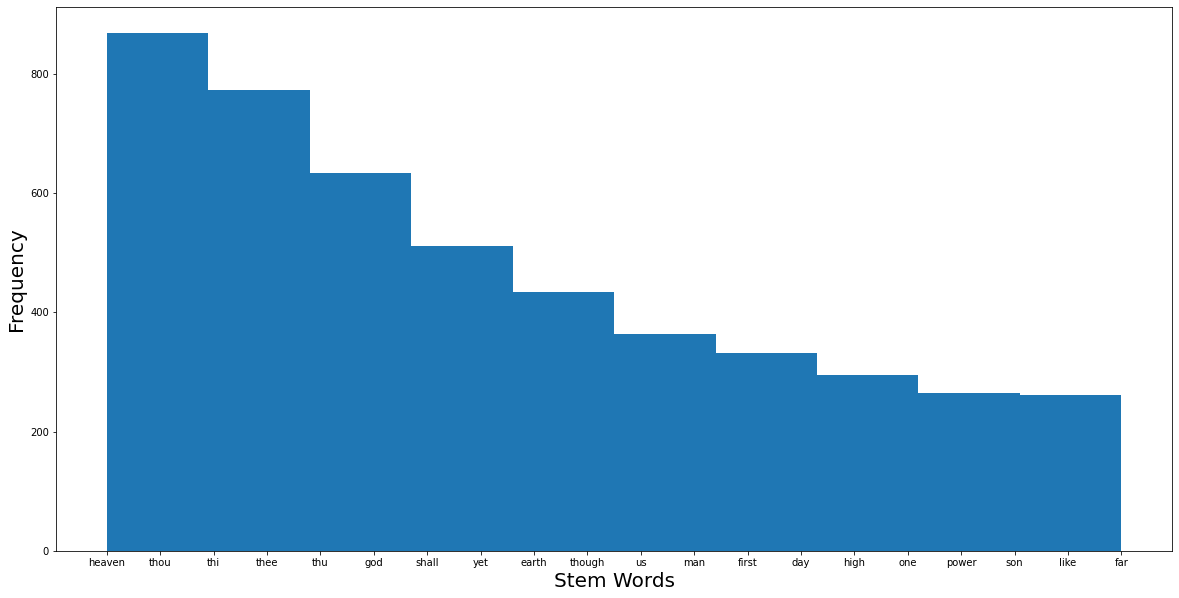

In [279]:
fig = plt.figure(figsize=(20, 10))

hist(top_20_df.Stem, weights=top_20_df.Number)

#yticks(range(1, 2))

plt.xlabel("Stem Words", fontsize = 20)
plt.ylabel("Frequency", fontsize = 20)

plt.show()

4.	Perform Vader Sentiment Analysis on the book. Find the 5 most negative, 5 most positive, and 5 most neutral sentences in Paradise Lost*. http://www.nltk.org/howto/sentiment.html . This may take a while to run, so you can always start with a small subset of the data (100 sentences) and then once your code works as expected, expand it to the whole book and let it run. 

### Extracted Whole Book

In [ ]:
#Extracted book
whole_book

### Converting individual Strings to Sentences

In [280]:
# A list to add to
sentence_lst = []
    
#Iterate through the lists of strings within sentences
# i = int corresponding to each of the 98 lists
# str_lst = each list in the 'sentences'
# Enumerate() method adds a counter to an iterable
for i, str_lst in enumerate(whole_book):

    #link together(concatenate) the words
    new_sentence = ' '.join(str_lst).replace(' , ', ', ').replace(' : ', ': ').replace(" ' ", "'").replace(" ,'" , ",'").replace(' ?', "?").replace(' . ', '. ').replace(' .', '.').replace(' !', '!')
        
    # add/append the new sentence to empty_lst as a list. (This will result in list of lists)
    sentence_lst.append([new_sentence])

#print the sentence list
print(sentence_lst)   

[["Of Man's first disobedience, and the fruit Of that forbidden tree whose mortal taste Brought death into the World, and all our woe, With loss of Eden, till one greater Man Restore us, and regain the blissful seat, Sing, Heavenly Muse, that, on the secret top Of Oreb, or of Sinai, didst inspire That shepherd who first taught the chosen seed In the beginning how the heavens and earth Rose out of Chaos: or, if Sion hill Delight thee more, and Siloa's brook that flowed Fast by the oracle of God, I thence Invoke thy aid to my adventurous song, That with no middle flight intends to soar Above th'Aonian mount, while it pursues Things unattempted yet in prose or rhyme."], ["And chiefly thou, O Spirit, that dost prefer Before all temples th'upright heart and pure, Instruct me, for thou know'st ; thou from the first Wast present, and, with mighty wings outspread, Dove - like sat'st brooding on the vast Abyss, And mad'st it pregnant: what in me is dark Illumine, what is low raise and support ;

In [281]:
print(type(sentence_lst))

<class 'list'>


### Vader Sentiment Analysis

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
#nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

In [282]:
list_sentiment_scores= []
for line_list in sentence_lst:
    all_sentences = line_list
    for single_sentence in all_sentences:
        list_sentiment_scores.append(analyzer.polarity_scores(single_sentence))
    #print(sentiment)

In [283]:
list_sentiment_scores

[{'neg': 0.117, 'neu': 0.689, 'pos': 0.194, 'compound': 0.8885},
 {'neg': 0.054, 'neu': 0.771, 'pos': 0.175, 'compound': 0.8546},
 {'neg': 0.093, 'neu': 0.668, 'pos': 0.239, 'compound': 0.8689},
 {'neg': 0.263, 'neu': 0.737, 'pos': 0.0, 'compound': -0.3612},
 {'neg': 0.178, 'neu': 0.601, 'pos': 0.221, 'compound': 0.6808},
 {'neg': 0.16, 'neu': 0.801, 'pos': 0.039, 'compound': -0.6908},
 {'neg': 0.185, 'neu': 0.752, 'pos': 0.063, 'compound': -0.5994},
 {'neg': 0.307, 'neu': 0.483, 'pos': 0.21, 'compound': -0.8047},
 {'neg': 0.343, 'neu': 0.657, 'pos': 0.0, 'compound': -0.7783},
 {'neg': 0.323, 'neu': 0.593, 'pos': 0.085, 'compound': -0.961},
 {'neg': 0.156, 'neu': 0.622, 'pos': 0.222, 'compound': 0.4939},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.7096},
 {'neg': 0.23, 'neu': 0.657, 'pos': 0.113, 'compound': -0.6239},
 {'neg': 0.131, 'neu': 0.674, 'pos': 0.195, 'compound': 0.7473},
 {'neg': 0.211, 'neu': 0.715, 'pos':

In [284]:
sentiment_scores_df = pd.DataFrame(list_sentiment_scores)

In [285]:
sentiment_scores_df

,neg,neu,pos,compound
0,0.117,0.689,0.194,0.8885
1,0.054,0.771,0.175,0.8546
2,0.093,0.668,0.239,0.8689
3,0.263,0.737,0.000,-0.3612
4,0.178,0.601,0.221,0.6808
...,...,...,...,...
1843,0.153,0.720,0.127,-0.5499
1844,0.150,0.567,0.283,0.5719
1845,0.000,0.889,0.111,0.7469
1846,0.028,0.865,0.107,0.6597


### Negative Sentences

In [286]:
sentiment_scores_df.sort_values("neg", ascending=False)

,neg,neu,pos,compound
510,1.000,0.000,0.000,-0.7088
151,1.000,0.000,0.000,-0.3595
1687,1.000,0.000,0.000,-0.3382
476,0.777,0.223,0.000,-0.5411
173,0.772,0.228,0.000,-0.5255
...,...,...,...,...
1329,0.000,1.000,0.000,0.0000
1330,0.000,0.931,0.069,0.3182
646,0.000,0.909,0.091,0.2732
917,0.000,0.708,0.292,0.8832


In [287]:
neg_list = []

neg_list.extend([sentence_lst[510], sentence_lst[151], sentence_lst[1687], sentence_lst[476], sentence_lst[173]])

In [288]:
neg_list

[['O Hell!'], ['No!'], ['Alas!'], ['Me miserable!'], ['Sad cure!']]

### Postive Sentences

In [289]:
sentiment_scores_df.sort_values("pos", ascending=False)

,neg,neu,pos,compound
1439,0.000,0.000,1.000,0.5562
826,0.000,0.000,1.000,0.5562
603,0.000,0.000,1.000,0.5255
906,0.000,0.000,1.000,0.5255
1231,0.000,0.162,0.838,0.9381
...,...,...,...,...
1392,0.000,1.000,0.000,0.0000
188,0.191,0.809,0.000,-0.7650
1394,0.139,0.861,0.000,-0.5267
1396,0.000,1.000,0.000,0.0000


In [290]:
pos_list = []

pos_list.extend([sentence_lst[1439], sentence_lst[826], sentence_lst[603], sentence_lst[906], sentence_lst[1231]])

In [291]:
pos_list

[['O Heaven!'],
 ['O Heaven!'],
 ['O friends!'],
 ['O Friends!'],
 ['She fair, divinely fair, fit love for Gods!']]

### Neutral Sentences

In [292]:
sentiment_scores_df.sort_values("neu", ascending=False)

,neg,neu,pos,compound
1029,0.000,1.0,0.000,0.0000
281,0.000,1.0,0.000,0.0000
304,0.000,1.0,0.000,0.0000
602,0.000,1.0,0.000,0.0000
301,0.000,1.0,0.000,0.0000
...,...,...,...,...
1439,0.000,0.0,1.000,0.5562
510,1.000,0.0,0.000,-0.7088
1687,1.000,0.0,0.000,-0.3382
40,0.754,0.0,0.246,-0.5707


In [293]:
neu_list = []

neu_list.extend([sentence_lst[1029], sentence_lst[281], sentence_lst[304], sentence_lst[602], sentence_lst[301]])

In [294]:
neu_list

[['Book VIII'],
 ['Before the gates there sat On either side a formidable Shape.'],
 ['I know thee not, nor ever saw till now Sight more detestable than him and thee."'],
 ['To whom their Chief, Gabriel, from the front thus called aloud.'],
 ["And know'st for whom?"]]

In [176]:
print(type(sentiment))

<class 'dict'>


5.	Explain your findings from the previous question. Are the sentences and their sentiment analysis scores correct? Explain why or why not. 

The sentences and their sentiment analysis scores are correct as the word choice in each set of sentences is indicative of their respective scores. The underlying sentiment for each set below is in fact is negative, positive and neutral. 

#### Negative:

[['O Hell!'], ['No!'], ['Alas!'], ['Me miserable!'], ['Sad cure!']]

#### Positive
[['O Heaven!'],
 ['O Heaven!'],
 ['O friends!'],
 ['O Friends!'],
 ['She fair, divinely fair, fit love for Gods!']]
 
 
#### Neutral 
[['Book VIII'],
 ['Before the gates there sat On either side a formidable Shape.'],
 ['I know thee not, nor ever saw till now Sight more detestable than him and thee."'],
 ['To whom their Chief, Gabriel, from the front thus called aloud.'],
 ["And know'st for whom?"]]


